# Resumen
Realice un informe en el que presente los resultados obtenidos al implementar un modelo regresión lineal.

In [ ]:
# Librerías
library(readxl)
library(dplyr)
library(car)
library(explore)
library(psych)
library(corrplot)
library(readr)
library(GGally)

# Resultado de la exploracion de datos

In [8]:
ruta_train <- "Train real state.csv"
ruta_test <- "Test real state.csv"
train <- read_csv(ruta_train)

options(width = 200)

train <- train %>%
    select(-starts_with("..."))

dim(train)
# names(train) <- make.names((names(train)))

train <- train %>% mutate((across(where(is.character), as.factor)))

glimpse(train)

New names:
• `` -> `...1`
Rows: 4124 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): HallwayType, HeatingType, AptManageType, TimeToBusStop, TimeToSubway, SubwayStation
dbl (25): ...1, SalePrice, YearBuilt, YrSold, MonthSold, Size.sqf., Floor, N_Parkinglot.Ground., N_Parkinglot.Basement., N_APT, N_manager, N_elevators, N_FacilitiesNearBy.PublicOffice., N_Faciliti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 4124   30

Rows: 4,124
Columns: 30
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ MonthSold                          <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 1…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 91

In [11]:
# Eliminando columnas
train_num <- train %>% select(-MonthSold, -N_SchoolNearBy.High., -N_SchoolNearBy.Middle., -HallwayType, -HeatingType, -AptManageType, -TimeToBusStop, -TimeToSubway, -SubwayStation)
glimpse(train_num)


Rows: 4,124
Columns: 21
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 914, 355, 355, 644, 914,…
$ Floor                              <dbl> 3, 8, 6, 3, 2, 10, 13, 4, 11, 18, 7, 24, 2, 1, 1, 20, 18, 12, 3, 39, 10, 13, 15, 7, 15, 9, 5, 1, 18, 16, 7, 11, 12, 8, 14, 8, 7, 16, 

In [ ]:
# Despues quiero incluir las variables categoricas en el modelo, POR AHORA SOLO VOY A SEGUIR CON LAS NUMERICAS
# train$HallwayType_cod <- as.numeric(factor(train$HallwayType))
# train$HallwayType_cod <- as.numeric(factor(train$HeatingType))
# glimpse(train)

# Selección de las variables del modelo (20 puntos)

In [12]:
# Por ahora solo variables numericas
glimpse(train_num)

Rows: 4,124
Columns: 21
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 914, 355, 355, 644, 914,…
$ Floor                              <dbl> 3, 8, 6, 3, 2, 10, 13, 4, 11, 18, 7, 24, 2, 1, 1, 20, 18, 12, 3, 39, 10, 13, 15, 7, 15, 9, 5, 1, 18, 16, 7, 11, 12, 8, 14, 8, 7, 16, 

# Determinación de la estructura del modelo (20 puntos)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

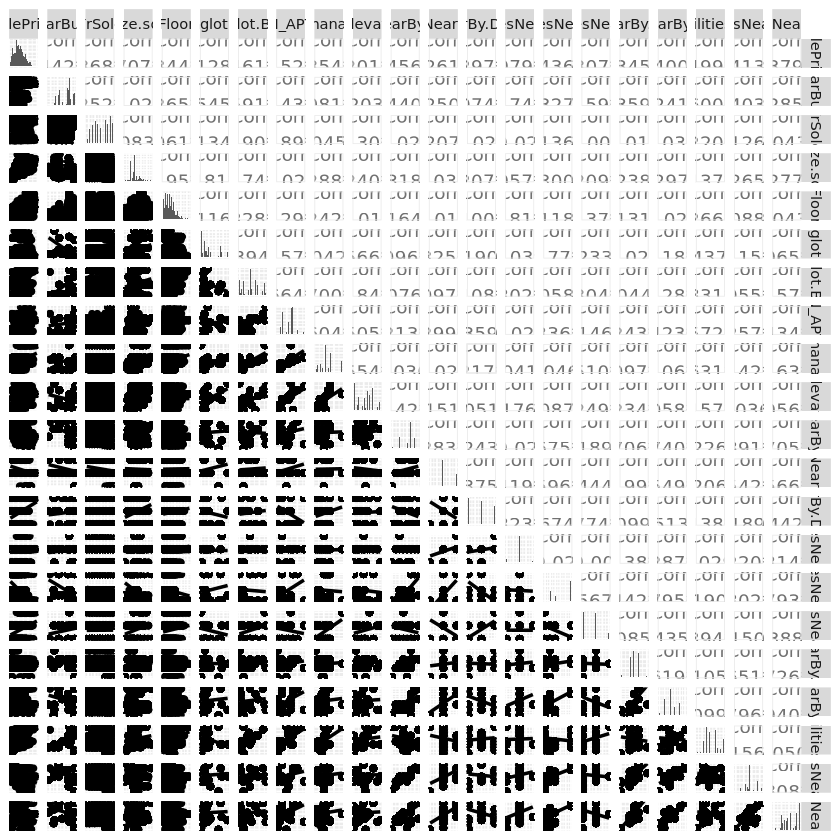

# Estimación de los parámetros del modelo (5 puntos)

In [ ]:
modelo_num <- lm(SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + N_elevators + # nolint: line_length_linter.
                    N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + # nolint
                    N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. +N_SchoolNearBy.Elementary. + N_SchoolNearBy.University. + N_FacilitiesInApt + # nolint: line_length_linter.
                    N_FacilitiesNearBy.Total. + N_SchoolNearBy.Total.
                , data = train_num) # nolint
summary(modelo_num)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. + 
    N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
    N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_SchoolNearBy.University. + N_FacilitiesInApt + N_FacilitiesNearBy.Total. + 
    N_SchoolNearBy.Total., data = train_num)

Residuals:
    Min      1Q  Median      3Q     Max 
-197985  -24149    2504   23740  145822 

Coefficients: (1 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -2.542e+07  5.528e+05 -45.980  < 2e-16 ***
YearBuilt                           1.049e+03  1.591e+02   6.596 4.75e-11 ***
YrSold                              1.161e+04  2.388e+02  48.625  < 2e-16 ***
Size.sqf.              

# Verificación de los supuestos del modelo (25 puntos)

# Determinación de la bondad de ajuste del modelo (5 puntos)

# Cálculo de intervalos de confianza para los parámetros del modelo (5 puntos)

# Prueba de hipótesis sobre los parámetros del modelo (10 puntos) 

# Interpretación de los coeficientes del modelo (10 puntos) 